<a href="https://colab.research.google.com/github/Rairaiskitvomen/ML-codezzzz/blob/main/Product_Demand_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OBJECTIVES**


In this notebook , i will be creating ,evaluating and comparing several models for forecasting price demands

**Work-Flow**

1 Loading the  Demand dataset

2 Understanding the data

3 Data Cleaning

4 Data visualisation

5 Forecast Modelling and Results
  - XBboost
  - ARIMA
  - SARIMA
  - Exponential Smoothing

6  Metrics that will be used
  - Mean absolute error
  - Root squared error
  - Mean absolute percentage Error

**LOAD DATASET AND IMPORT LIBRARIES**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [44]:
df = pd.read_csv("Historical Demand Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9140 entries, 0 to 9139
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        9140 non-null   object
 1   Product_id  9140 non-null   object
 2   Demand      9140 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 214.3+ KB


**UNDERSTANDING THE DATA**

In [45]:
# Statistical summary of the data
# Note that this only take numerical columns of the original data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Demand,9140.0,17.673961,9.796141,0.0,10.0,16.0,24.0,65.0


In [46]:
df.Date.unique()

array(['2012-01-01', '2012-01-02', '2012-01-03', ..., '2016-12-30',
       '2016-12-31', '2017-01-01'], dtype=object)

In [47]:
df.Product_id.unique() # Just 5 unique values

array(['Product_001', 'Product_002', 'Product_003', 'Product_004',
       'Product_005'], dtype=object)

In [48]:
print(df.Date.max()) # Max date
print(df.Date.min()) # Min date

2017-01-01
2012-01-01


In [49]:
df.head(2)

,Date,Product_id,Demand
0,2012-01-01,Product_001,3
1,2012-01-01,Product_002,1


**DATA CLEANING**

- I would convert the datatime to datetime pandas variable

- I woulde set the corrected date as my index

In [50]:
df.dtypes

Date          object
Product_id    object
Demand         int64
dtype: object

In [51]:
df  = df.set_index("Date") # setting date columns as index
df.index = pd.to_datetime(df.index) # converting date column to datetime

In [52]:
df.dtypes # The error has been corrected

Product_id    object
Demand         int64
dtype: object

In [53]:
df.head(2)

,Product_id,Demand
Date,,
2012-01-01,Product_001,3
2012-01-01,Product_002,1


**DATA VISUALISATION/EDA**

- I would check the demand values accross the years

In [54]:
# Going to use the colors in the palette for visualisation
color_pal = sb.color_palette()
color_pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

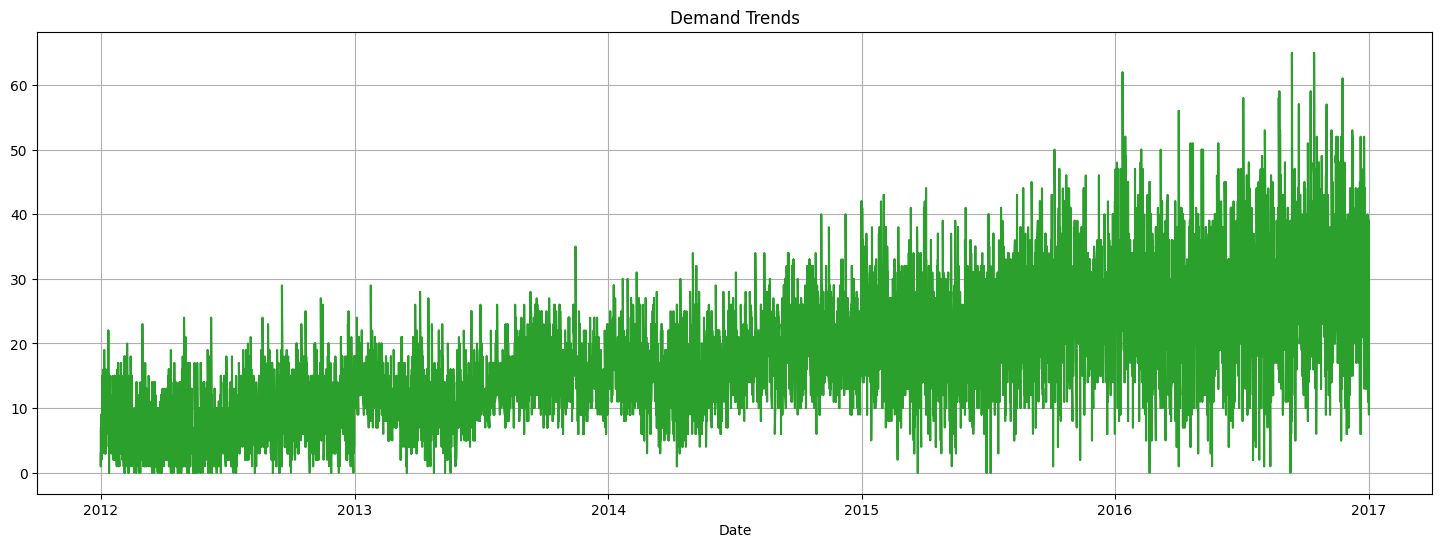

In [55]:
plt.figure(figsize = (18,6))
plt.plot(df.Demand , color = color_pal[2])
plt.title("Demand Trends")
plt.xlabel("Date")
plt.grid(True)
plt.show()


-  From the above diagram the Mean(average) demand value increase each year

- This only shows a coagulated(clustered) chart for each year , we need to sort for each year , we need specific plot for each year

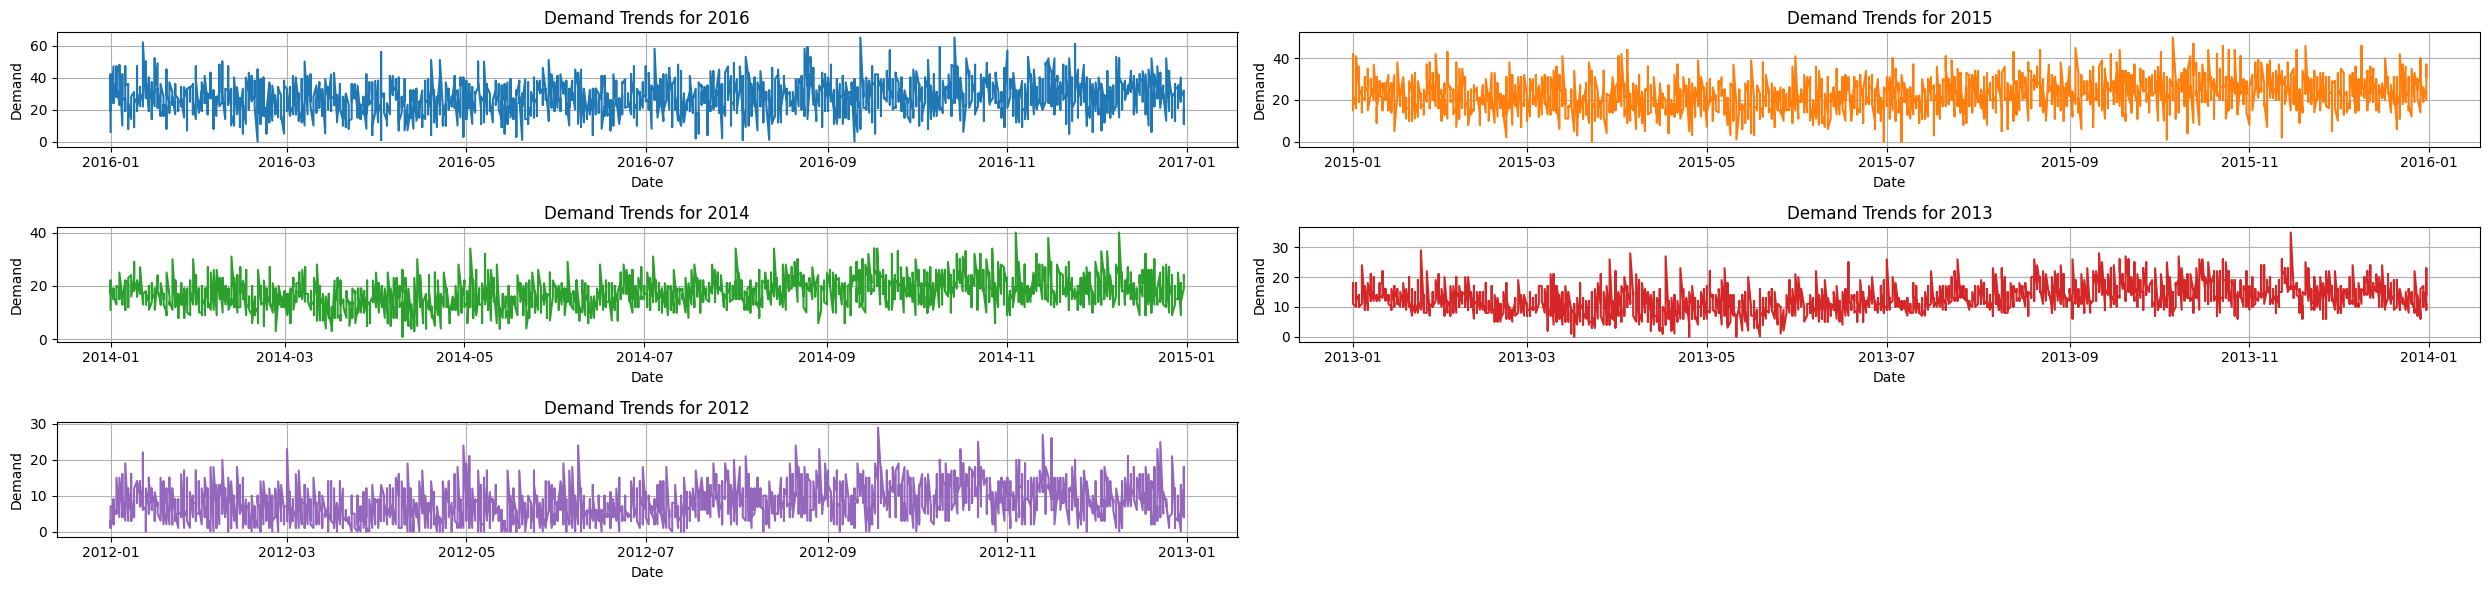

In [56]:
# Plotting the chart for each year
first_year = df.loc[(df.index < "2017-01-01") & (df.index >=  "2016-01-01")]
second_year = df.loc[(df.index < "2016-01-01") & (df.index >=  "2015-01-01")]
third_year = df.loc[(df.index < "2015-01-01") & (df.index >=  "2014-01-01")]
fourth_year = df.loc[(df.index < "2014-01-01") & (df.index >=  "2013-01-01")]
fifth_year = df.loc[(df.index < "2013-01-01") & (df.index >=  "2012-01-01")]

fig , axes = plt.subplots(3,2, figsize = (25,6))
# Plot each year's data
axes[0, 0].plot(first_year.index, first_year.Demand, color=color_pal[0])
axes[0, 0].set_title("Demand Trends for 2016")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Demand")
axes[0, 0].grid(True)

axes[0, 1].plot(second_year.index, second_year.Demand, color=color_pal[1])
axes[0, 1].set_title("Demand Trends for 2015")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("Demand")
axes[0, 1].grid(True)

axes[1, 0].plot(third_year.index, third_year.Demand, color=color_pal[2])
axes[1, 0].set_title("Demand Trends for 2014")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Demand")
axes[1, 0].grid(True)

axes[1, 1].plot(fourth_year.index, fourth_year.Demand, color=color_pal[3])
axes[1, 1].set_title("Demand Trends for 2013")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("Demand")
axes[1, 1].grid(True)

axes[2, 0].plot(fifth_year.index, fifth_year.Demand, color=color_pal[4])
axes[2, 0].set_title("Demand Trends for 2012")
axes[2, 0].set_xlabel("Date")
axes[2, 0].set_ylabel("Demand")
axes[2, 0].grid(True)


# Hides the unused subplot
fig.delaxes(axes[2, 1]) # A sixth subplot was created , so i deleted it using that syntax


plt.tight_layout()
plt.show()



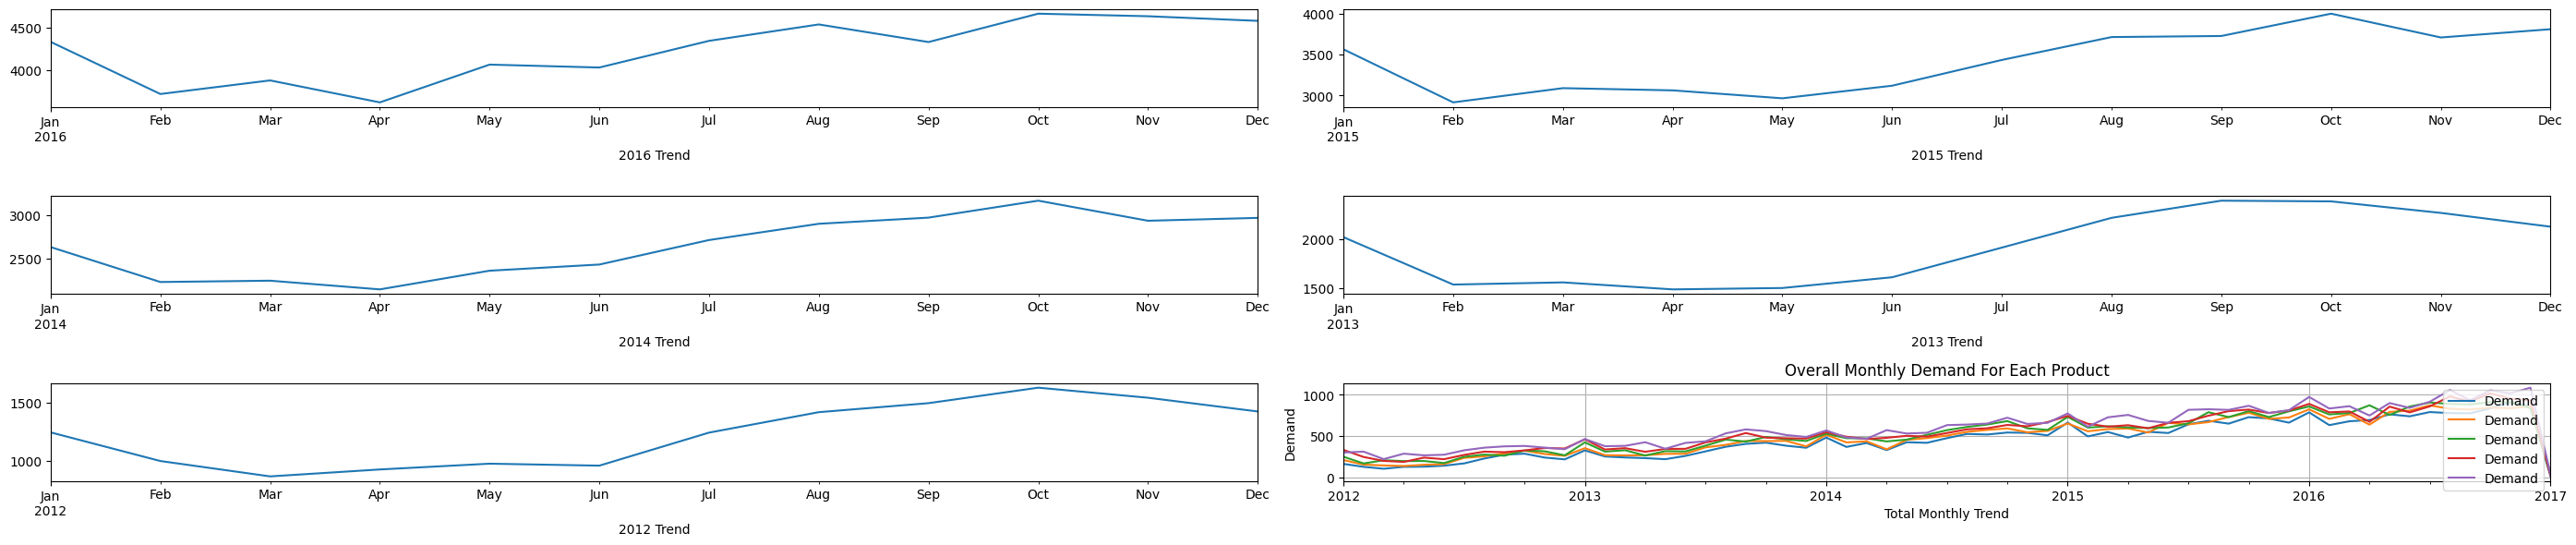

In [57]:
# Plotting the charts[Demand column] on a monthly basis
# Aggregating the data based on Monthly levels
fig , axes = plt.subplots(3,2, figsize = (28,6))
df.loc[(df.index < "2017-01-01") & (df.index >= "2016-01-01")].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0],ax =axes[0,0], xlabel = "2016 Trend" )
df.loc[(df.index < "2016-01-01") & (df.index >= "2015-01-01")].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0],ax =axes[0,1], xlabel = "2015 Trend" )
df.loc[(df.index < "2015-01-01") & (df.index >= "2014-01-01")].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0],ax =axes[1,0], xlabel = "2014 Trend" )
df.loc[(df.index < "2014-01-01") & (df.index >= "2013-01-01")].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0],ax =axes[1,1], xlabel = "2013 Trend" )
df.loc[(df.index < "2013-01-01") & (df.index >= "2012-01-01")].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0],ax =axes[2,0], xlabel = "2012 Trend" )

#Performing an iteartion on the product_id columns
for product in df.Product_id.unique():
  monthly_product_demand = df[df.Product_id == product].groupby(pd.Grouper(freq = "M")).sum()
  monthly_product_demand.plot(kind = "line",  ax = axes[2,1])
axes[2,1].set_xlabel("Total Monthly Trend")
axes[2,1].set_ylabel("Demand")
axes[2,1].grid(True)
axes[2,1].set_title("Overall Monthly Demand For Each Product")
plt.tight_layout()
plt.show()



- This plot seems to be simpler i.e Less clustered

- There is usually a decline at the first month and then increases as the year goes by.

- There is always a high demand around October , it is consistent across each year

- The trend seems to be  closely consistent every year

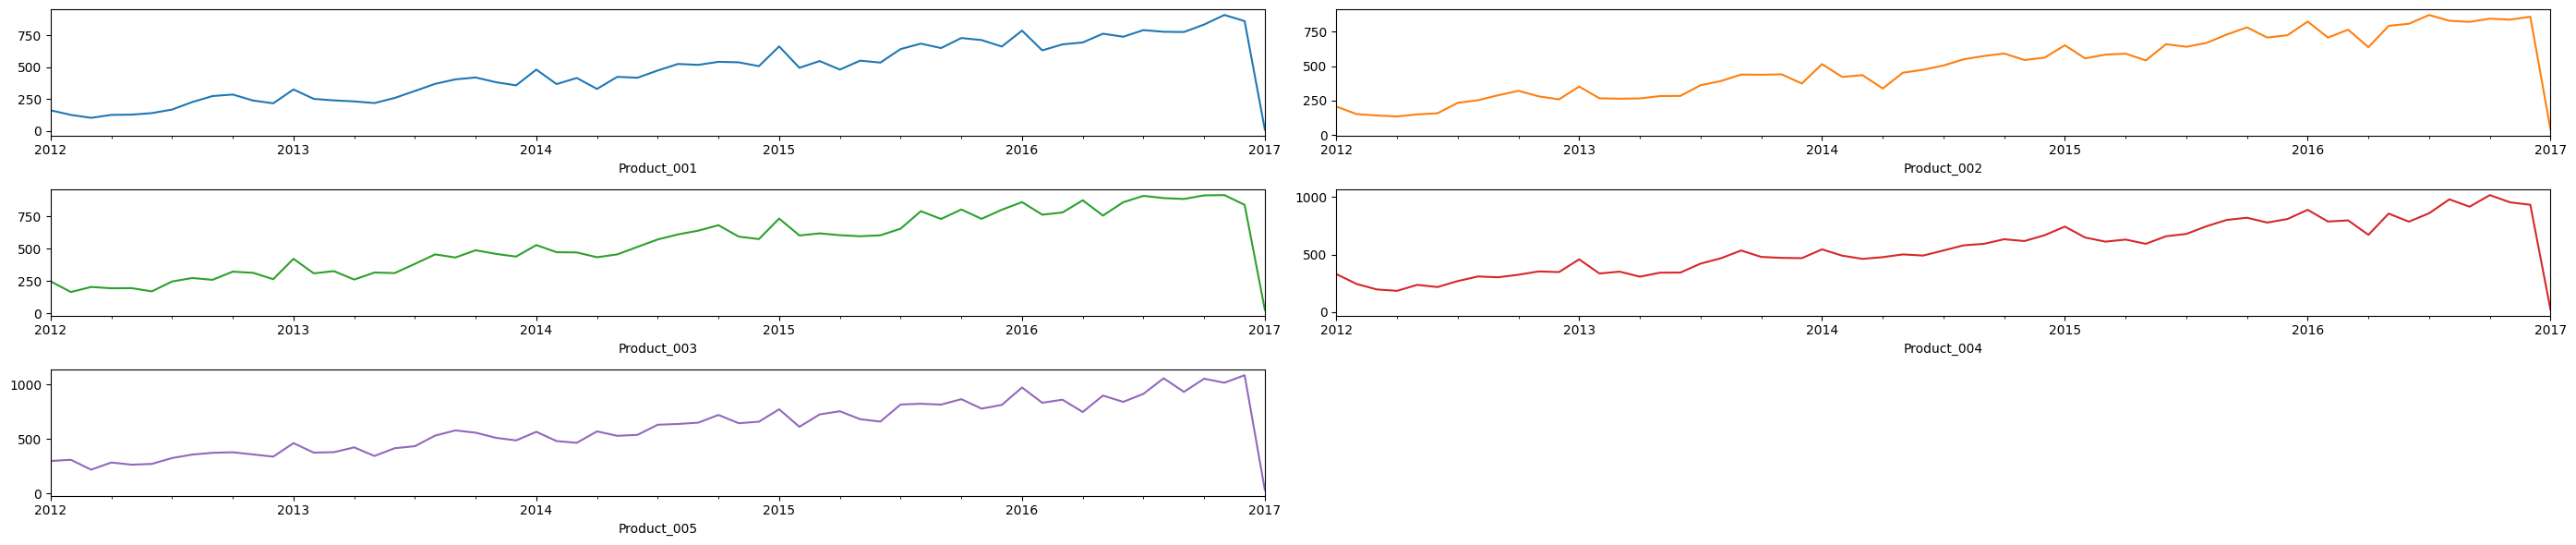

In [58]:
#Plotting each product on a monthly basis
# so from Product_001 - Product_005
fig , axes = plt.subplots(3,2, figsize = (28,6))
df[df.Product_id == "Product_001"].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[0], ax = axes[0,0],xlabel = "Product_001")
df[df.Product_id == "Product_002"].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[1], ax = axes[0,1],xlabel = "Product_002")
df[df.Product_id == "Product_003"].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[2], ax = axes[1,0],xlabel = "Product_003")
df[df.Product_id == "Product_004"].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[3], ax = axes[1,1],xlabel = "Product_004")
df[df.Product_id == "Product_005"].groupby(pd.Grouper(freq = "M")).sum().Demand.plot(kind = "line", color = color_pal[4], ax = axes[2,0],xlabel = "Product_005")

# Hides the unused subplot(There is always a sixth plot created so i decided to delete - optional)
# You can use that plot to add another visualisation
fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()

- There are observable variance trends in the products demands( some below 250 and some above 250)

- But there is always an increase in demand of each product as the months go by( we see that rise in the trend)

- Demands seems to be influenced in different timeline


**FEATURE ENGINEERING**

In [59]:
def get_features(dataframe):
  dataframe = dataframe.copy()
  dataframe["day_of_week"] =dataframe.index.dayofweek
  dataframe["months"] = dataframe.index.month
  dataframe["year"] = dataframe.index.year
  dataframe["quarter"] = dataframe.index.quarter
  dataframe["weeks"] = dataframe.index.to_series().apply(lambda x: x.isocalendar()[1])


  return dataframe


In [60]:
df_new = get_features(df)

In [61]:
df_new.dtypes #this constitute thefeatures for our modelling

Product_id     object
Demand          int64
day_of_week     int32
months          int32
year            int32
quarter         int32
weeks           int64
dtype: object

**FORECAST MODELLING AND EVALUATION**

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculating_scores(predicted_values , actual_values):
  mae = mean_absolute_error(predicted_values , actual_values)
  rmse = np.sqrt(mean_squared_error(predicted_values , actual_values))


#Calculating it manually because out actual values may contain zero
# the constant 1 was added to prevent ZeroDivisionError
  mape = np.mean(abs(actual_values - predicted_values/(actual_values +1))) * 100
  return mae , mape, rmse


In [63]:
df_train = df_new.loc[df_new.index < "2016-01-01"].copy()
df_test = df_new.loc[df_new.index >= "2016-01-01"].copy()



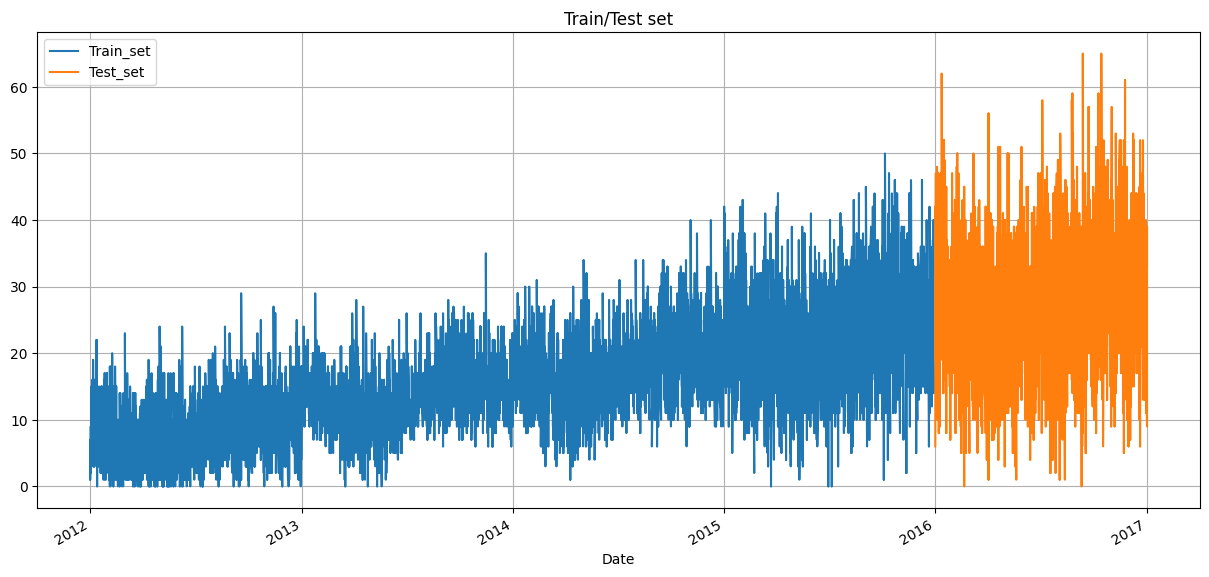

In [64]:
#Visualising the train and test data
fig , ax = plt.subplots(figsize = ( 15, 7))
df_train.Demand.plot(ax = ax, label = "Train_set" , legend= "train set", title = "Train/Test set")
df_test.Demand.plot(ax = ax, label = "Test_set" , legend= "test set")
plt.grid(True)
plt.show();

In [65]:
df_new.columns


Index(['Product_id', 'Demand', 'day_of_week', 'months', 'year', 'quarter',
       'weeks'],
      dtype='object')

In [66]:
features = ["day_of_week", "months", "year", "quarter", "weeks"] #features
target = ["Demand"]                                           #target

In [67]:
from xgboost import XGBRegressor

In [78]:
# Creating a variable to store the result
model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (WEEKS)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].resample("W").sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].resample("W").sum()

  X_train = df_new_train_product_id[features]
  Y_train = df_new_train_product_id[target]
  X_test = df_new_test_product_id[features]
  Y_test = df_new_test_product_id[target]

#Initailising model and training model
  model = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
  model.fit(X_train , Y_train, eval_set = [(X_train, Y_train), (X_test , Y_test)], verbose = 50)

  prediction = model.predict(X_test)
  mae, rmse , mape = calculating_scores(prediction , Y_test.values)
  model_result["product"].append(product_id)
  model_result["mae"].append(mae)
  model_result["rmse"].append(rmse)
  model_result["mape"].append(mape)
  model_result["predicted"].append(prediction)
  model_result["y_test"].append(Y_test.Demand.values)

model_result_weekly = pd.DataFrame(model_result)


[0]	validation_0-rmse:41.97119	validation_1-rmse:89.45979
[50]	validation_0-rmse:27.74872	validation_1-rmse:70.89556
[100]	validation_0-rmse:19.30388	validation_1-rmse:59.79893
[150]	validation_0-rmse:14.40169	validation_1-rmse:53.20568
[200]	validation_0-rmse:11.50232	validation_1-rmse:49.35488
[250]	validation_0-rmse:9.71813	validation_1-rmse:47.16169
[300]	validation_0-rmse:8.54957	validation_1-rmse:45.83502
[350]	validation_0-rmse:7.80013	validation_1-rmse:45.14376
[400]	validation_0-rmse:7.20244	validation_1-rmse:44.77545
[450]	validation_0-rmse:6.72877	validation_1-rmse:44.61238
[500]	validation_0-rmse:6.23497	validation_1-rmse:44.53743
[550]	validation_0-rmse:5.84743	validation_1-rmse:44.41478
[600]	validation_0-rmse:5.55415	validation_1-rmse:44.35301
[650]	validation_0-rmse:5.28373	validation_1-rmse:44.31026
[700]	validation_0-rmse:5.03125	validation_1-rmse:44.23769
[750]	validation_0-rmse:4.67240	validation_1-rmse:44.16229
[800]	validation_0-rmse:4.29057	validation_1-rmse:44.1

In [79]:
model_result_weekly

,product,mae,rmse,mape,predicted,y_test
0,Product_001,38.472716,17381.091400,44.088927,"[5.7891994, 151.49078, 152.97093, 179.75346, 1...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,39.465826,18107.809963,46.336739,"[6.9676237, 159.13771, 159.13771, 160.36722, 1...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,40.803949,19270.529906,48.272387,"[8.010372, 157.94579, 157.94579, 161.68742, 14...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,39.496003,19684.481622,48.836284,"[11.083322, 198.99944, 199.98697, 167.0301, 11...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,44.141703,21167.049006,51.569075,"[22.486252, 167.3847, 167.3847, 164.31114, 168...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [100]:
model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (months)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].groupby(pd.Grouper(freq = "M")).sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].groupby(pd.Grouper(freq = "M")).sum()

  X_train = df_new_train_product_id[features]
  Y_train = df_new_train_product_id[target]
  X_test = df_new_test_product_id[features]
  Y_test = df_new_test_product_id[target]

#Initailising model and training model
  model = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01)
  model.fit(X_train , Y_train, eval_set = [(X_train, Y_train), (X_test , Y_test)], verbose = 50)

  prediction = model.predict(X_test)
  mae, rmse , mape = calculating_scores(prediction , Y_test.values)
  model_result["product"].append(product_id)
  model_result["mae"].append(mae)
  model_result["rmse"].append(rmse)
  model_result["mape"].append(mape)
  model_result["predicted"].append(prediction)
  model_result["y_test"].append(Y_test.Demand.values)

model_result_monthly = pd.DataFrame(model_result)

[0]	validation_0-rmse:174.41538	validation_1-rmse:383.91489
[50]	validation_0-rmse:121.56338	validation_1-rmse:340.00162
[100]	validation_0-rmse:86.32807	validation_1-rmse:319.20089
[150]	validation_0-rmse:62.01056	validation_1-rmse:306.93146
[200]	validation_0-rmse:44.80790	validation_1-rmse:299.07483
[250]	validation_0-rmse:32.48077	validation_1-rmse:294.52326
[300]	validation_0-rmse:23.87459	validation_1-rmse:290.30553
[350]	validation_0-rmse:17.87465	validation_1-rmse:287.34020
[400]	validation_0-rmse:13.65887	validation_1-rmse:284.47423
[450]	validation_0-rmse:10.45461	validation_1-rmse:282.75089
[500]	validation_0-rmse:8.10889	validation_1-rmse:281.99982
[550]	validation_0-rmse:6.37002	validation_1-rmse:281.68855
[600]	validation_0-rmse:5.03751	validation_1-rmse:281.31477
[650]	validation_0-rmse:4.01494	validation_1-rmse:281.14540
[700]	validation_0-rmse:3.16520	validation_1-rmse:280.54343
[750]	validation_0-rmse:2.43502	validation_1-rmse:280.06127
[800]	validation_0-rmse:1.88860

In [81]:
model_result_monthly

,product,mae,rmse,mape,predicted,y_test
0,Product_001,250.384546,71377.304512,279.341217,"[565.34863, 337.55298, 551.7671, 178.96552, 56...","[787, 632, 679, 694, 763, 739, 791, 778, 776, ..."
1,Product_002,247.213508,73998.238334,273.648634,"[577.43604, 338.56833, 573.98114, 222.44229, 5...","[824, 708, 765, 638, 793, 808, 872, 830, 822, ..."
2,Product_003,265.208247,78692.973834,312.172189,"[638.9284, 284.41745, 639.1474, 275.6432, 618....","[859, 762, 779, 873, 755, 858, 907, 890, 883, ..."
3,Product_004,284.794695,80453.990584,309.406493,"[614.55945, 336.20322, 618.83685, 252.97173, 6...","[890, 788, 798, 672, 857, 787, 860, 981, 917, ..."
4,Product_005,244.987765,86418.668765,259.232585,"[689.1896, 446.60056, 731.7866, 486.14313, 728...","[974, 834, 862, 749, 900, 842, 916, 1059, 934,..."


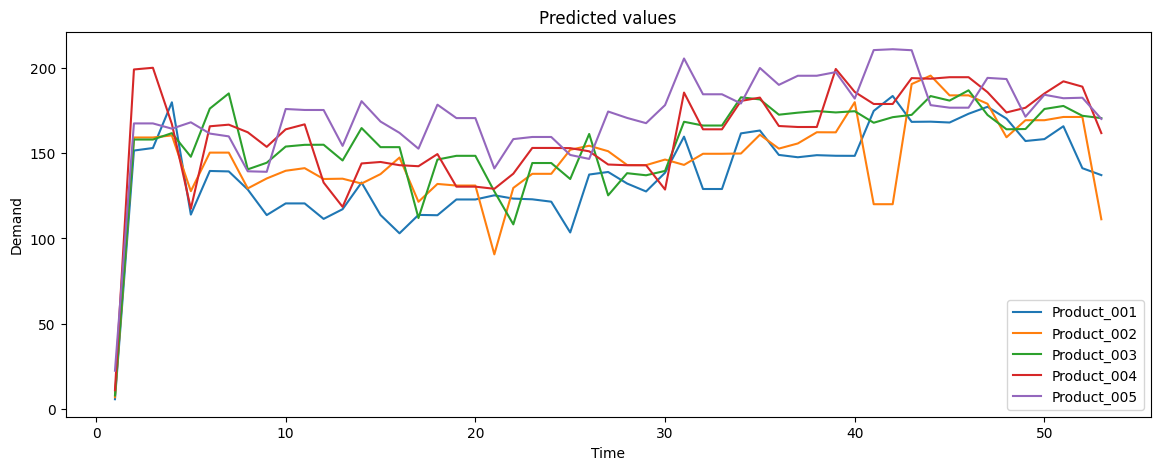

In [91]:
plt.figure(figsize = (14,5))
for i, row in model_result_weekly.iterrows():
  plt.plot(range(1, len(row["predicted"]) + 1), row["predicted"] , label = row["product"]) #from the first value of predicted column to the last value( +1 was added to capture the last value)
plt.xlabel("Time")
plt.ylabel("Demand")
plt.title("Predicted values")
plt.legend()
plt.show();

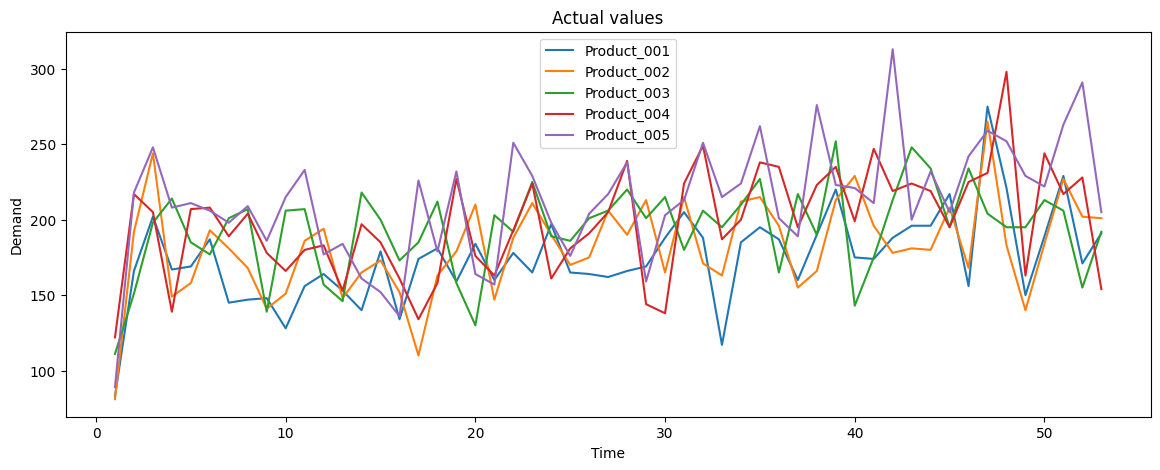

In [93]:
plt.figure(figsize = (14,5))
for i, row in model_result_weekly.iterrows():
  plt.plot(range(1, len(row["y_test"]) + 1), row["y_test"] , label = row["product"]) #from the first value of predicted column to the last value( +1 was added to capture the last value)
plt.xlabel("Time")
plt.ylabel("Demand")
plt.title("Actual values")
plt.legend()
plt.show();

- We see from the  early week between the predicted and actual value , here is an increase in demand

- It still alligns both predicted and atual as per some product are highly demanded  probably due to how valualble they are used at the end of the week

ARIMA (AutoRegressive Integrated Moving Average) is a widely used statistical model for time series forecasting. It is particularly useful for capturing the temporal dependencies in time series data

In [94]:
from statsmodels.tsa.arima.model import ARIMA

In [101]:
arima_model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (months)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()


  Y_train = df_new_train_product_id[target]
  Y_test = df_new_test_product_id[target]

#Initailising model and training model
  model = ARIMA(Y_train , order= (1,1,1))
  model_fit =model.fit()

  prediction = model_fit.forecast(len(Y_test))
  Y_test = Y_test.values.reshape(-1)


  mae, rmse , mape = calculating_scores(prediction , Y_test)
  arima_model_result["product"].append(product_id)
  arima_model_result["mae"].append(mae)
  arima_model_result["rmse"].append(rmse)
  arima_model_result["mape"].append(mape)
  arima_model_result["predicted"].append(prediction.values)
  arima_model_result["y_test"].append(Y_test)

arima_model_result_weekly = pd.DataFrame(arima_model_result)

In [102]:

arima_model_result_weekly

,product,mae,rmse,mape,predicted,y_test
0,Product_001,43.252912,17383.620496,50.162728,"[126.15667370199594, 132.93430632272694, 133.8...","[83, 166, 202, 167, 169, 187, 145, 147, 148, 1..."
1,Product_002,39.273536,18107.423207,46.920431,"[141.01210883032127, 146.12795591996192, 146.7...","[81, 192, 244, 149, 158, 193, 181, 168, 141, 1..."
2,Product_003,36.416148,19266.357735,41.130539,"[159.54846669441667, 163.5363015757889, 163.99...","[111, 151, 198, 214, 185, 177, 201, 207, 139, ..."
3,Product_004,39.625191,19682.180414,47.721409,"[154.75274604666666, 163.38975534156228, 164.8...","[122, 217, 205, 139, 207, 208, 189, 204, 178, ..."
4,Product_005,49.797747,21168.763916,58.299619,"[160.74405674656896, 167.68883420078964, 168.6...","[89, 218, 248, 208, 211, 206, 198, 209, 186, 2..."


In [103]:
model_result_weekly["mape"].mean()

47.82068236558753

In [104]:
arima_model_result_weekly["mape"].mean()

48.846945159765745

SARIMA ALGORITHM

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima_model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (months)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()


  Y_train = df_new_train_product_id[target]
  Y_test = df_new_test_product_id[target]

    # Initialising and training SARIMA model
  model = SARIMAX(Y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))  # Adjust seasonal_order as necessary
  model_fit = model.fit()

  prediction = model_fit.forecast(steps=len(Y_test))
  Y_test = Y_test.values.reshape(-1)

  mae, rmse, mape = calculating_scores(prediction, Y_test)
  sarima_model_result["product"].append(product_id)
  sarima_model_result["mae"].append(mae)
  sarima_model_result["rmse"].append(rmse)
  sarima_model_result["mape"].append(mape)
  sarima_model_result["predicted"].append(prediction.values)
  sarima_model_result["y_test"].append(Y_test)

sarima_model_result_weekly = pd.DataFrame(sarima_model_result)


In [113]:
sarima_model_result_weekly["mape"].mean()

37.218987751293994

EXPONENTIAL SMOOTHING

In [111]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [114]:

exp_model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (months)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()


  Y_train = df_new_train_product_id[target]
  Y_test = df_new_test_product_id[target]

    # Initialising and training SARIMA model
  model = ExponentialSmoothing(Y_train, trend = "add", seasonal = "add", seasonal_periods = 52)
  model_fit = model.fit()

  prediction = model_fit.forecast(steps=len(Y_test))
  Y_test = Y_test.values.reshape(-1)

  mae, rmse, mape = calculating_scores(prediction, Y_test)
  exp_model_result["product"].append(product_id)
  exp_model_result["mae"].append(mae)
  exp_model_result["rmse"].append(rmse)
  exp_model_result["mape"].append(mape)
  exp_model_result["predicted"].append(prediction.values)
  exp_model_result["y_test"].append(Y_test)

exp_model_result_weekly = pd.DataFrame(exp_model_result)

In [116]:
exp_model_result_weekly["mape"].mean()

36.281135230919155

MODEL PEROFRMANCE AND FORECAST FUNCTION

In [121]:
mean_results = exp_model_result_weekly[['mae', 'rmse', 'mape']].mean()
print(mean_results)


mae        28.337893
rmse    19103.333247
mape       36.281135
dtype: float64


In [122]:
mean_results = arima_model_result_weekly[['mae', 'rmse', 'mape']].mean()
print(mean_results)

mae        41.673107
rmse    19121.669154
mape       48.846945
dtype: float64


In [123]:
mean_results = sarima_model_result_weekly[['mae', 'rmse', 'mape']].mean()
print(mean_results)

mae        29.340000
rmse    19103.637057
mape       37.218988
dtype: float64


In [124]:
mean_results = model_result_weekly[['mae', 'rmse', 'mape']].mean()
print(mean_results)

mae        40.476039
rmse    19122.192379
mape       47.820682
dtype: float64


Recommendation

- I can  perfom Hyperparameter tuning to tweak our 4 models

- Both Sarima and ExponentialSmoothing should be used due to season(Trends over time)

In [132]:
product_forecast_model = []
exp_model_result = {
    "product" : [],
    "mae": [],
    "rmse": [],
    "mape": [],
    "predicted" : [],
    "y_test": []
}
for product_id in df_train["Product_id"].unique():
  # subselecting according to product (months)
  df_new_train_product_id = df_train[df_train.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()
  df_new_test_product_id = df_test[df_test.Product_id == product_id].groupby(pd.Grouper(freq = "W")).sum()


  Y_train = df_new_train_product_id[target]
  Y_test = df_new_test_product_id[target]

    # Initialising and training SARIMA model
  model = ExponentialSmoothing(Y_train, trend = "add", seasonal = "add", seasonal_periods = 52)
  model_fit = model.fit()
  product_forecast_model.append(model_fit)

  prediction = model_fit.forecast(steps=len(Y_test))
  Y_test = Y_test.values.reshape(-1)

  mae, rmse, mape = calculating_scores(prediction, Y_test)
  exp_model_result["product"].append(product_id)
  exp_model_result["mae"].append(mae)
  exp_model_result["rmse"].append(rmse)
  exp_model_result["mape"].append(mape)
  exp_model_result["predicted"].append(prediction.values)
  exp_model_result["y_test"].append(Y_test)

exp_model_result_weekly = pd.DataFrame(exp_model_result)

In [135]:
def forecast(weeks, product = None):
  if product:
    models =[product_forecast_model[product -1]]
  else:
    models = product_forecast_model
  forecast_values = [model.forecast(steps = weeks) for model in models]
  return forecast_values


In [137]:
forecast(4,5)

[2016-01-10    206.377045
 2016-01-17    193.374865
 2016-01-24    198.386461
 2016-01-31    207.378075
 Freq: W-SUN, dtype: float64]